### Lane Curvature (Lesson 12)

Self-driving cars need to be told the correct steering angle to turn left or right and we can calculate this angle if we know a few things about the speed and dynamics of the car and how much the lane is curving. To determine the curvature, we’ll go through the following steps:

* First, we’ll detect the lane lines using some masking and thresholding techniques.
* Then, perform a perspective transform to get a birds eye view of the lanes. This lets us fit a polynomial to the lane lines, which we couldn’t do very easily before.
* Then, we can extract the curvature the lines from this polynomial with just a little math.

### Undistort and Transform (Lesson 17)
Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

* Undistort the image using cv2.undistort() with mtx and dist
* Convert to grayscale
* Find the chessboard corners
* Draw corners
* Define 4 source points (the outer 4 corners detected in the chessboard pattern)
* Define 4 destination points (must be listed in the same order as src points!)
* Use cv2.getPerspectiveTransform() to get M, the transform matrix
* use cv2.warpPerspective() to apply M and warp your image to a top-down view

In [1]:
import pickle
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
# Calibrating Your Camera (Lesson 10)

# Arrays to store object points and image points from all the iamges
# objpoints = [] # 3D points in real world space
# imgpoints = [] # 2d points in the image place

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0)...,(7,5,0)
# objp = np.zeros((6*9, 3), np.float32)
# objp[:, :2] = np.mgrid[0:9,0:6].T.reshape(-1, 2) # x,y coordinates
# print(objp)

# images = glob.glob("./camera_cal/calibration*.jpg")
# print(type(images))
# for fname in images:
    # read in image
#     img = mpimg.imread(fname)
# 
    # Convert image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
#     print(ret)

    # If corners are found, add object points and image points
#     if ret == True:
#         objpoints.append(objp)
#         imgpoints.append(corners)
    
        # draw and display the corners
#         cv2.drawChessboardCorners(img, (8,6), corners, ret)
        
        # write image
        # write_name = 'corners_found' + str(idx) + '.jpg'
        # cv2.imwrite('./corners/' + write_name)

        # plt.imshow(img)
        # cv2.imshow('img', img)
        #cv2.waitKey(500)

# cv2.destroyAllWindows()

In [21]:
# Undistort and Transform (Lesson 17)
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):    
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print('ret:', ret)
    
    # 4. If corners found:
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (8,6), corners, ret)
        
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset of dst points

        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([
                [offset,offset],
                [img_size[0]-offset,offset],
                [img_size[0]-offset,img_size[1]-offset],
                [offset,img_size[1]-offset]])
        
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        
        # E. warp image
        warped = cv2.warpPerspective(undist, M, img_size)
        
    return warped, M

In [22]:
# Read in an image
# cv2.imread() returns False on `ret`
# img = cv2.imread('./camera_cal/calibration3.jpg')

img = mpimg.imread('./camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dist_pickle = pickle.load( open( "./saved_settings/undistort.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

ret: True


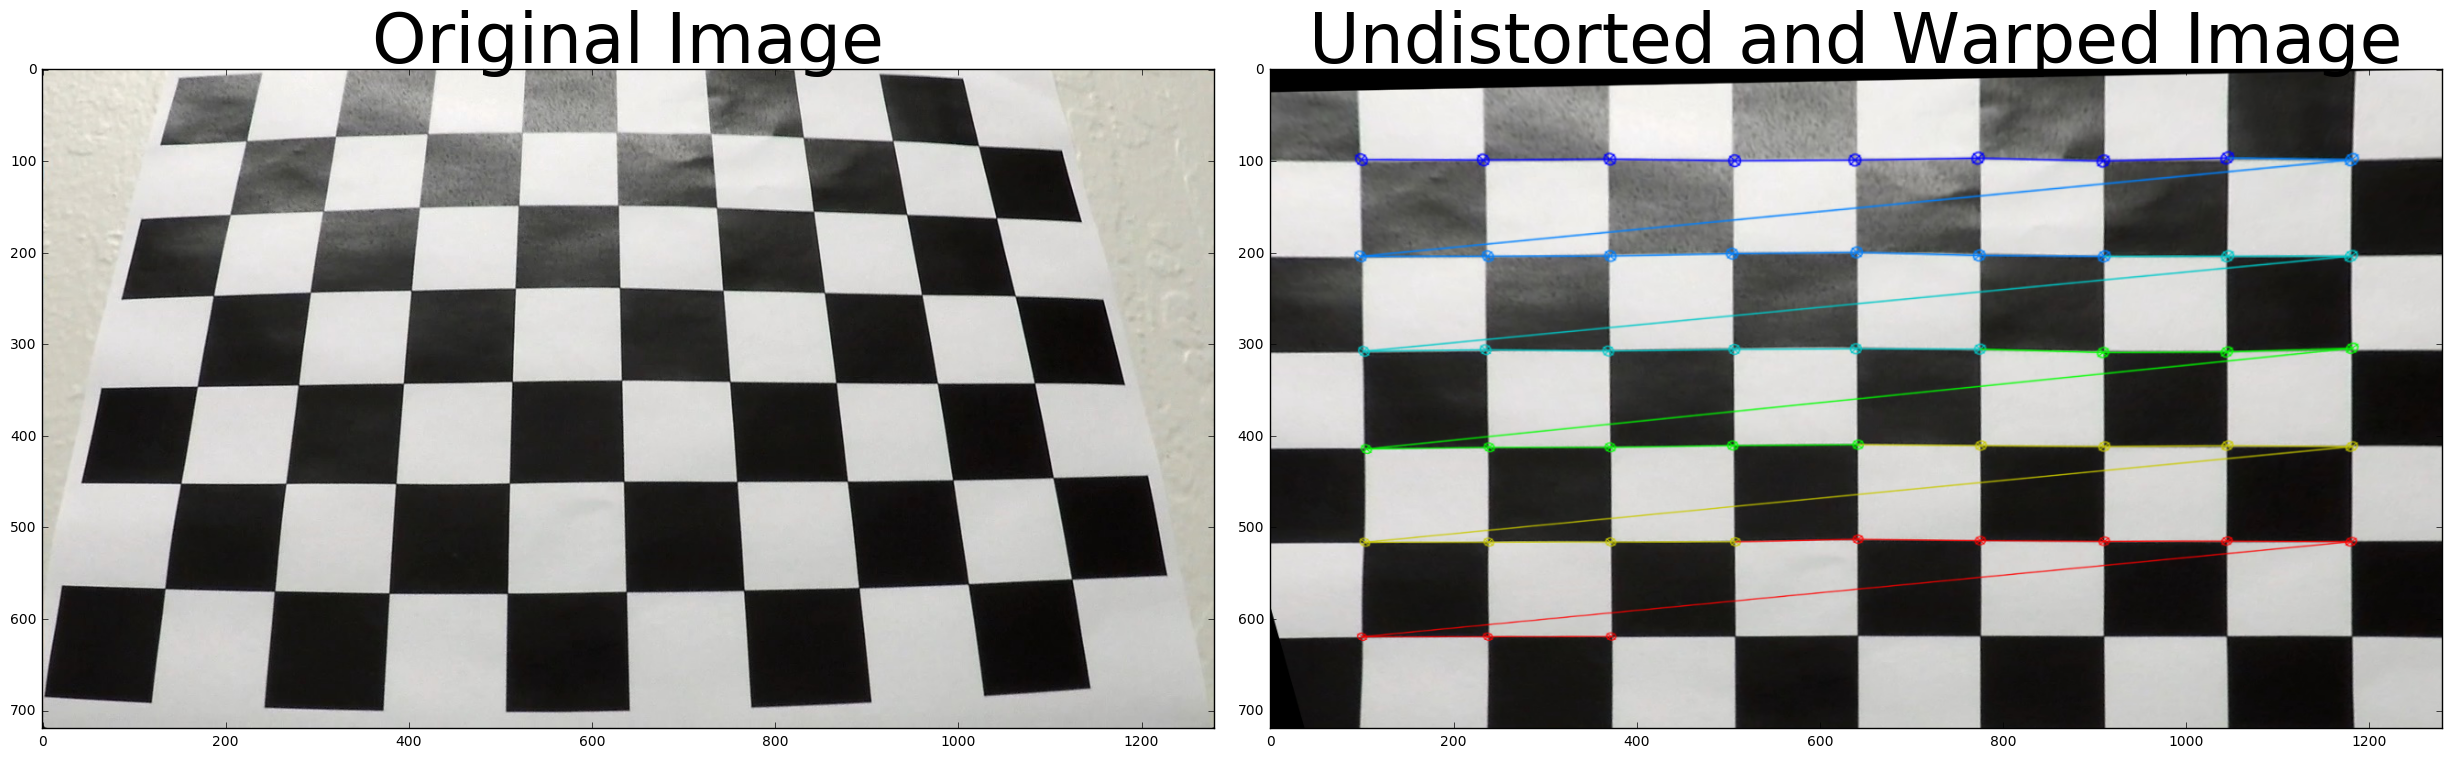

In [23]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()